In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm  
from sklearn.metrics import r2_score , mean_squared_error 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
bike=pd.read_csv('hour.csv')
bike

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [60]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [62]:
bike.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [64]:
bike.shape

(17379, 17)

In [66]:
bike.isnull().sum()*100/bike.shape[0]

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
hr            0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

<Axes: ylabel='cnt'>

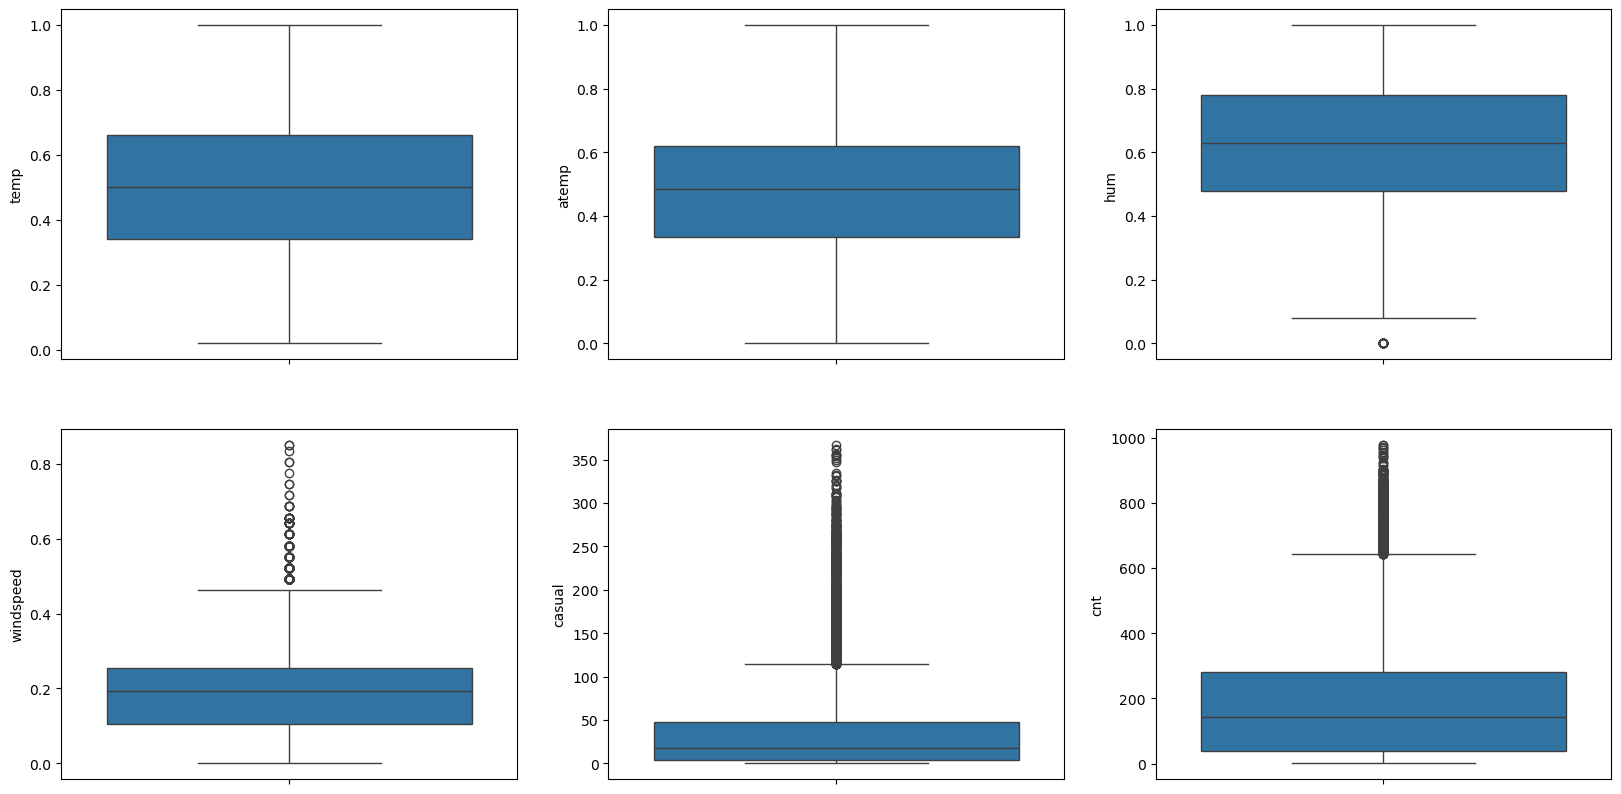

In [68]:
fig,axs=plt.subplots(2,3,figsize=(20,10))
sns.boxplot(bike['temp'],ax=axs[0,0])
sns.boxplot(bike['atemp'],ax=axs[0,1])
sns.boxplot(bike['hum'],ax=axs[0,2])
sns.boxplot(bike['windspeed'],ax=axs[1,0])
sns.boxplot(bike['casual'],ax=axs[1,1])
sns.boxplot(bike['cnt'],ax=axs[1,2])

<Axes: ylabel='casual'>

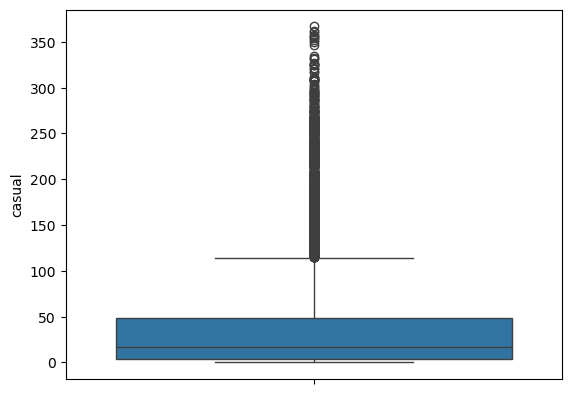

In [69]:
sns.boxplot(bike['casual'])

<Axes: ylabel='windspeed'>

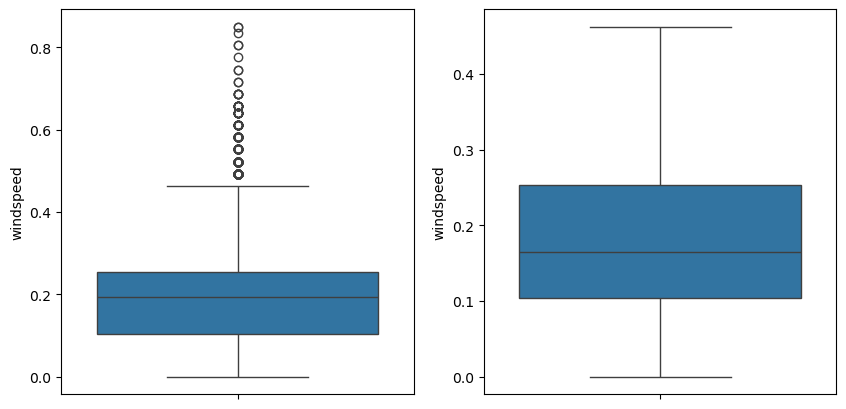

In [70]:
fig,axs=plt.subplots(1,2,figsize=(10,5))
sns.boxplot(bike['windspeed'],ax=axs[0])
Q1=bike.windspeed.quantile(0.25)
Q3=bike.windspeed.quantile(0.75)
IQR=Q3-Q1
bike=bike[(bike.windspeed >Q1-1.5*IQR) & (bike.windspeed<Q3+1.5*IQR) ]
sns.boxplot(bike['windspeed'],ax=axs[1])

<Axes: ylabel='cnt'>

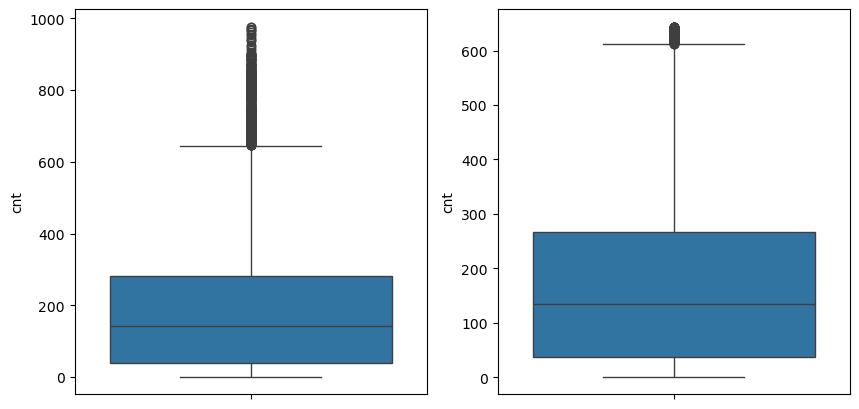

In [71]:
fig,axs=plt.subplots(1,2,figsize=(10,5))
sns.boxplot(bike['cnt'],ax=axs[0])
Q1=bike.cnt.quantile(0.25)
Q3=bike.cnt.quantile(0.75)
IQR=Q3-Q1
bike=bike[(bike.cnt >Q1-1.5*IQR) & (bike.cnt<Q3+1.5*IQR) ]
sns.boxplot(bike['cnt'],ax=axs[1])

In [72]:
bike['season']=bike['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
bike['weathersit']=bike['weathersit'].map({1: 'Clear',2: 'Mist/Cloudy',3: 'Light Snow/Rain',4: 'Heavy Rain/Snow'})

bike_model=bike.drop(['instant','dteday','casual','registered','temp'],axis=1)

bike_model=pd.get_dummies(bike_model, columns=['season', 'weathersit', 'weekday', 'mnth', 'hr'], drop_first=True)
for col in bike_model.select_dtypes(include='bool').columns:
    bike_model[col] = bike_model[col].map({True: 1, False: 0})

In [79]:
np.random.seed(0)
df_train,df_test=train_test_split(bike_model,train_size=0.8,test_size=0.2,random_state=100)


In [81]:
scaler=MinMaxScaler()
var=['cnt']
df_train[var]=scaler.fit_transform(df_train[var])

In [83]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23
5091,0,0,1,0.5909,0.78,0.0896,0.027994,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16312,1,0,0,0.3333,0.46,0.2537,0.496112,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8183,0,0,1,0.3333,0.57,0.1045,0.203733,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1199,0,0,1,0.1364,0.50,0.1940,0.007776,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5801,0,0,0,0.5758,0.83,0.1642,0.004666,0,0,0,...,0,0,0,0,0,0,0,0,0,0


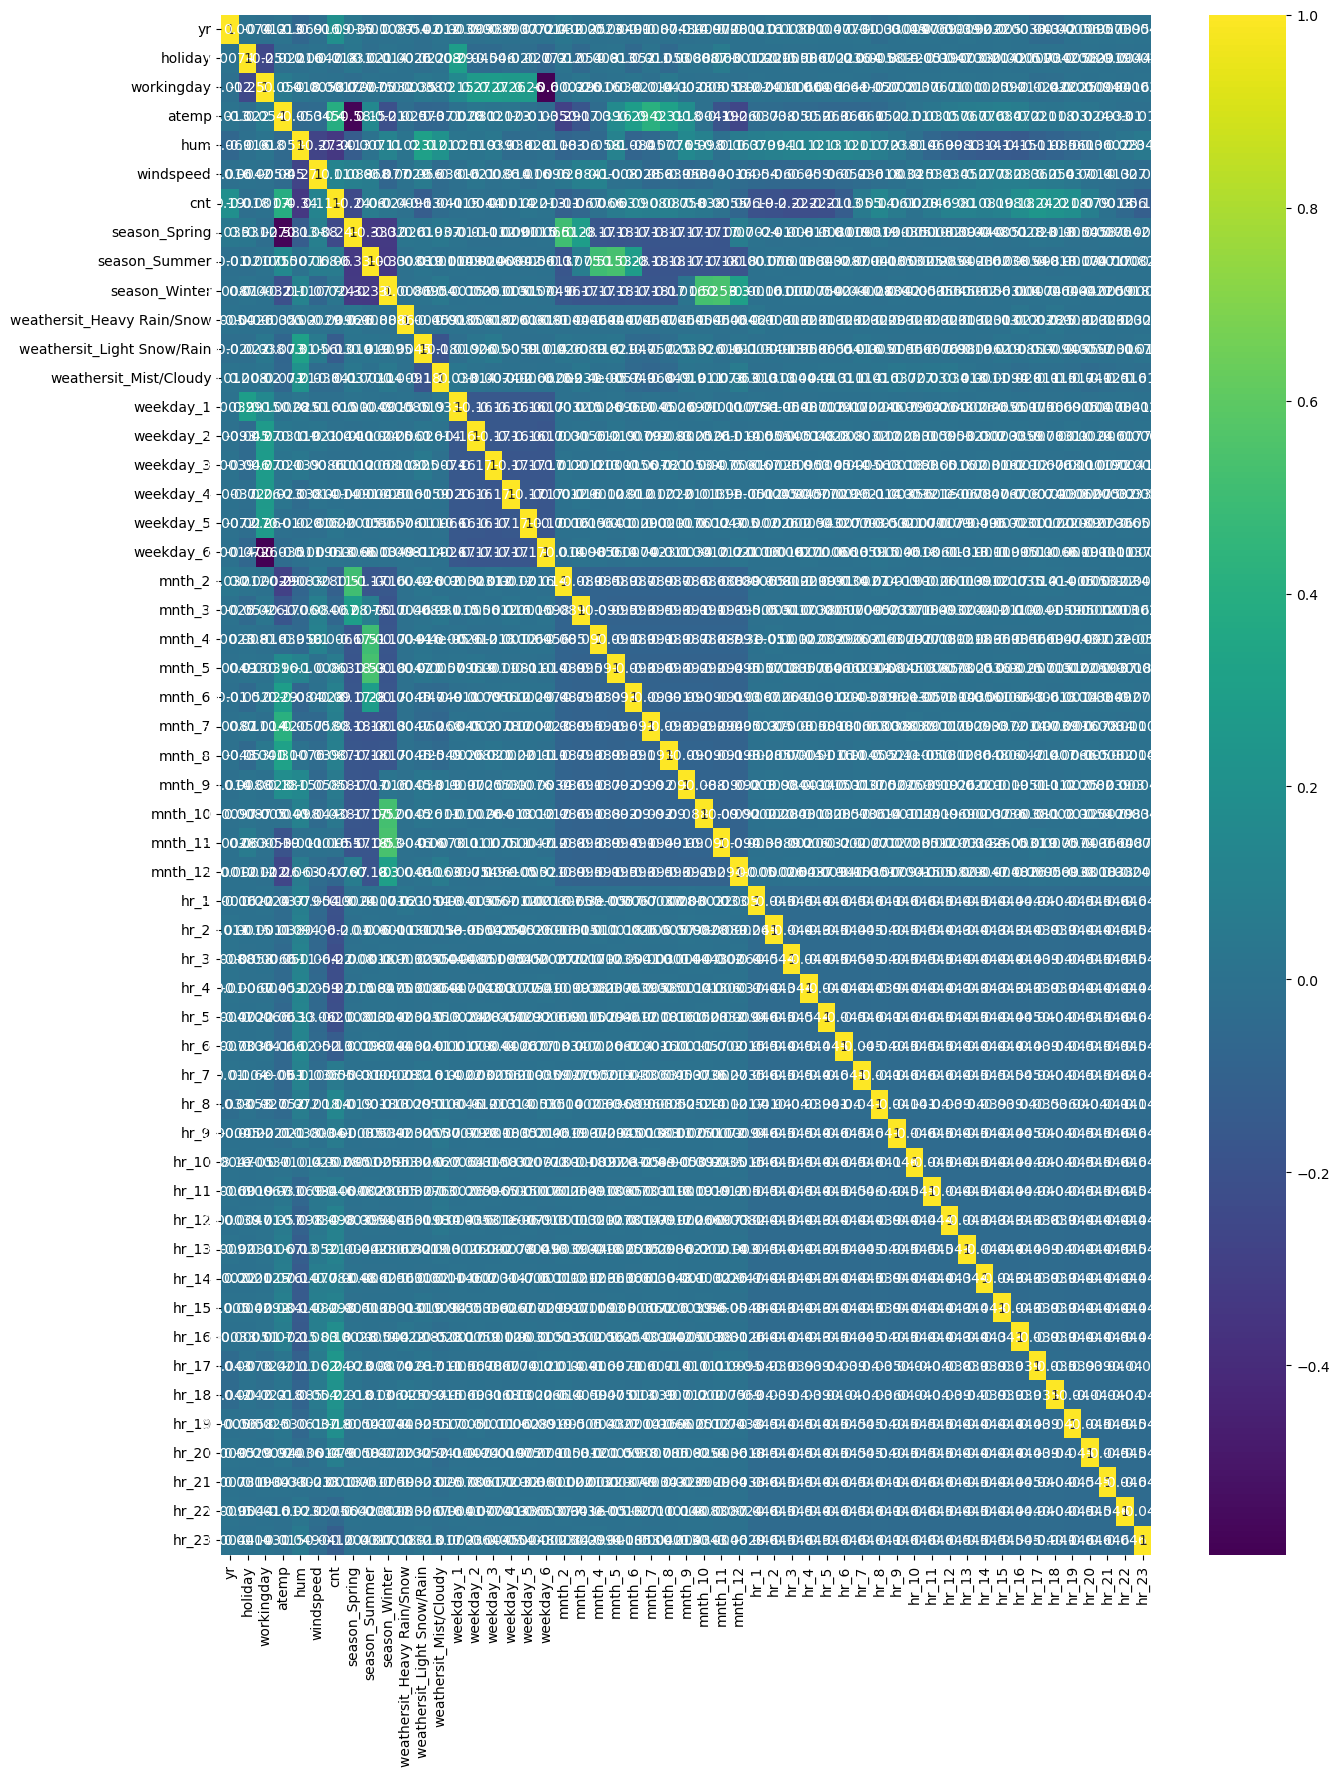

In [85]:
plt.figure(figsize=(15,20))
sns.heatmap(df_train.corr(),annot=True,cmap='viridis')
plt.show()


In [86]:
x_train=df_train
y_train=df_train.pop('cnt')

In [87]:
lm=LinearRegression()
# rfe=RFE(estimator=lm,n_features_to_select=46)

In [88]:
# rfe=rfe.fit(x_train,y_train)

In [89]:
x_train.shape

(13243, 52)

In [90]:
# list(zip(x_train.columns,rfe.support_,rfe.ranking_))

In [91]:
# col=x_train.columns[rfe.support_]
# X_train_rfe=x_train[col]
# X_train_rfe=sm.add_constant(X_train_rfe)

In [99]:
# OLS model 
# lm=sm.OLS(y_train,X_train_rfe).fit()

# Linear Regression model
# lm=LinearRegression()
lm.fit(x_train,y_train)

# Normal Equation:
# X_b = np.c_[np.ones((X_train_rfe.shape[0], 1)), X_train_rfe] 
# theta=np.linalg.inv(X_b.T @ X_b)@X_b.T@y_train

LinearRegression()

In [101]:
# For OLS only
# lm.summary()

In [103]:
# X_train

In [105]:
vif=pd.DataFrame()
X=x_train
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,holiday,inf
15,weekday_4,inf
2,workingday,inf
16,weekday_5,inf
12,weekday_1,inf
13,weekday_2,inf
14,weekday_3,inf
3,atemp,38.37
4,hum,18.57
8,season_Winter,9.16


In [106]:
df_test[var] = scaler.fit_transform(df_test[var])
y_test=df_test.pop('cnt')
x_test=df_test
# x_test=sm.add_constant(x_test)
# x_test_rfe=x_test[X_train_rfe.columns]
y_pred=lm.predict(x_test)
r2_score(y_test, y_pred)

# prediction using Normal Equation:
# X_test_b = np.c_[np.ones((x_test_rfe.shape[0], 1)), x_test_rfe]
# y_pred=X_test_b @ theta
# r2_score(y_test, y_pred )


0.6821914009868836